<a href="https://colab.research.google.com/github/Subirpaul01/ML_Assessment/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/train',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/test',
    labels='inferred',
    label_mode ='int',
    batch_size=16,
    image_size=(256,256)
)

Found 1830 files belonging to 2 classes.
Found 742 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalize pixel values to [0,1]
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_ds.class_names), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,                # Training data
    epochs=10,               # Number of epochs
    validation_data=validation_ds  # Validation data
)


Found 1830 files belonging to 2 classes.
Found 742 files belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
26/58 ━━━━━━━━━━━━━━━━━━━━ 1:13 2s/step - accuracy: 0.6000 - loss: 1.7067

KeyboardInterrupt: 

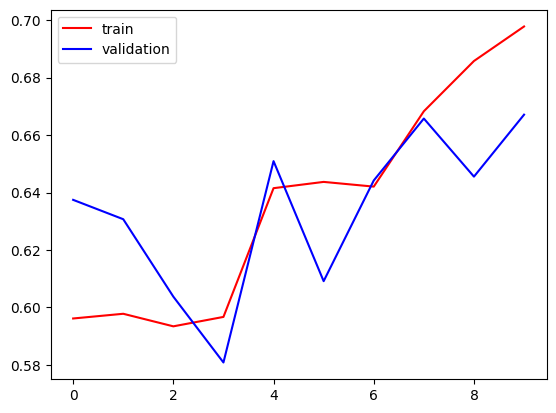

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#Normalize
def process(image,label):
  image =tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    x=train_ds,                # Training data
    epochs=10,                 # Number of epochs to train
    validation_data=validation_ds  # Validation data
)


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 345s 6s/step - accuracy: 0.5743 - loss: 7.7405 - val_accuracy: 0.6375 - val_loss: 3.0957
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 48s 162ms/step - accuracy: 0.6060 - loss: 4.9271 - val_accuracy: 0.6307 - val_loss: 3.1191
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.6030 - loss: 3.3357 - val_accuracy: 0.6038 - val_loss: 1.7367
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.6020 - loss: 2.1095 - val_accuracy: 0.5809 - val_loss: 1.0600
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.6508 - loss: 1.3770 - val_accuracy: 0.6509 - val_loss: 0.7447
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.6367 - loss: 1.1443 - val_accuracy: 0.6092 - val_loss: 0.7275
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.6626 - loss: 0.8703 - val_accuracy: 0.6442 - val_loss: 0.7745
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.6788 - loss: 0.7590 - val_accurac

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
# The output shape after Flatten() was not as expected by the Dense layer
# A GlobalAveragePooling could fix this issue.

#model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu', input_shape=(115200, ))) # Added input_shape to the first Dense layer
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Fixed typo in loss function name

history = model.fit(
    x=train_ds,                # Training data
    epochs=10,                 # Number of epochs to train
    validation_data=validation_ds  # Validation data
)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.5902 - loss: 4.0068 - val_accuracy: 0.6375 - val_loss: 2.4469
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.6014 - loss: 3.4792 - val_accuracy: 0.6375 - val_loss: 5.8323
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.5807 - loss: 2.2879 - val_accuracy: 0.6375 - val_loss: 4.0089
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.6222 - loss: 1.2656 - val_accuracy: 0.6375 - val_loss: 6.0197
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.6222 - loss: 0.9313 - val_accuracy: 0.6375 - val_loss: 8.0284
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.6281 - loss: 0.8563 - val_accuracy: 0.6375 - val_loss: 8.7428
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.6456 - loss: 0.7637 - val_accuracy: 0.6375 - val_loss: 13.1776
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.6668 - loss: 0.6653 - val_accur

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Added layer
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu', input_shape=(115200, )))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

# Added layer
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

TypeError: Image data of dtype object cannot be converted to float

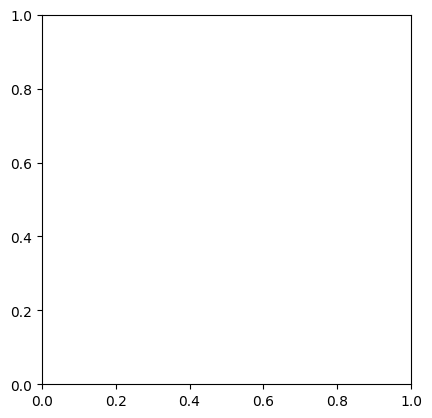

In [ ]:
import cv2
test_img =cv2.imread('/content/border-collie-dog-sitting-down-16192217.webp')
plt.imshow(test_img)
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step


array([[0.]], dtype=float32)

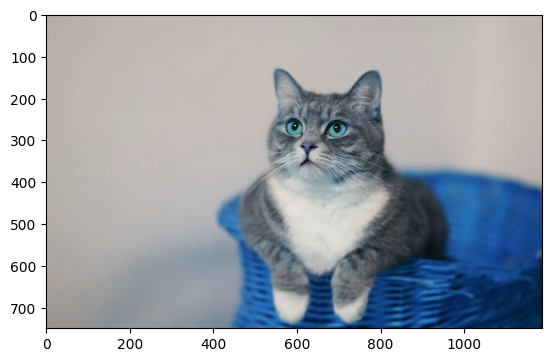

In [ ]:
import cv2
test_img =cv2.imread('/content/pexels-photo-1543793.webp')
plt.imshow(test_img)
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input) # Changed 'text_input' to 'test_input'